In [ ]:
! gdown 1V762g6p_cUDrI4zQC6TQcCAbX5Uh3weP

Downloading...
From: https://drive.google.com/uc?id=1V762g6p_cUDrI4zQC6TQcCAbX5Uh3weP
To: /content/glass.csv
100% 10.1k/10.1k [00:00<00:00, 22.8MB/s]


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/glass.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [ ]:
y = df['Type']
X = df.copy()
del X['Type']

In [ ]:
y

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 193, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt.score(X_train, y_train), dt.score(X_test, y_test)

(1.0, 0.7209302325581395)

In [ ]:
clf_rf = RandomForestClassifier(random_state=42, min_samples_split=4)
clf_rf.fit(X_train, y_train)
clf_rf.score(X_train, y_train), clf_rf.score(X_test, y_test)

(0.9941520467836257, 0.8604651162790697)

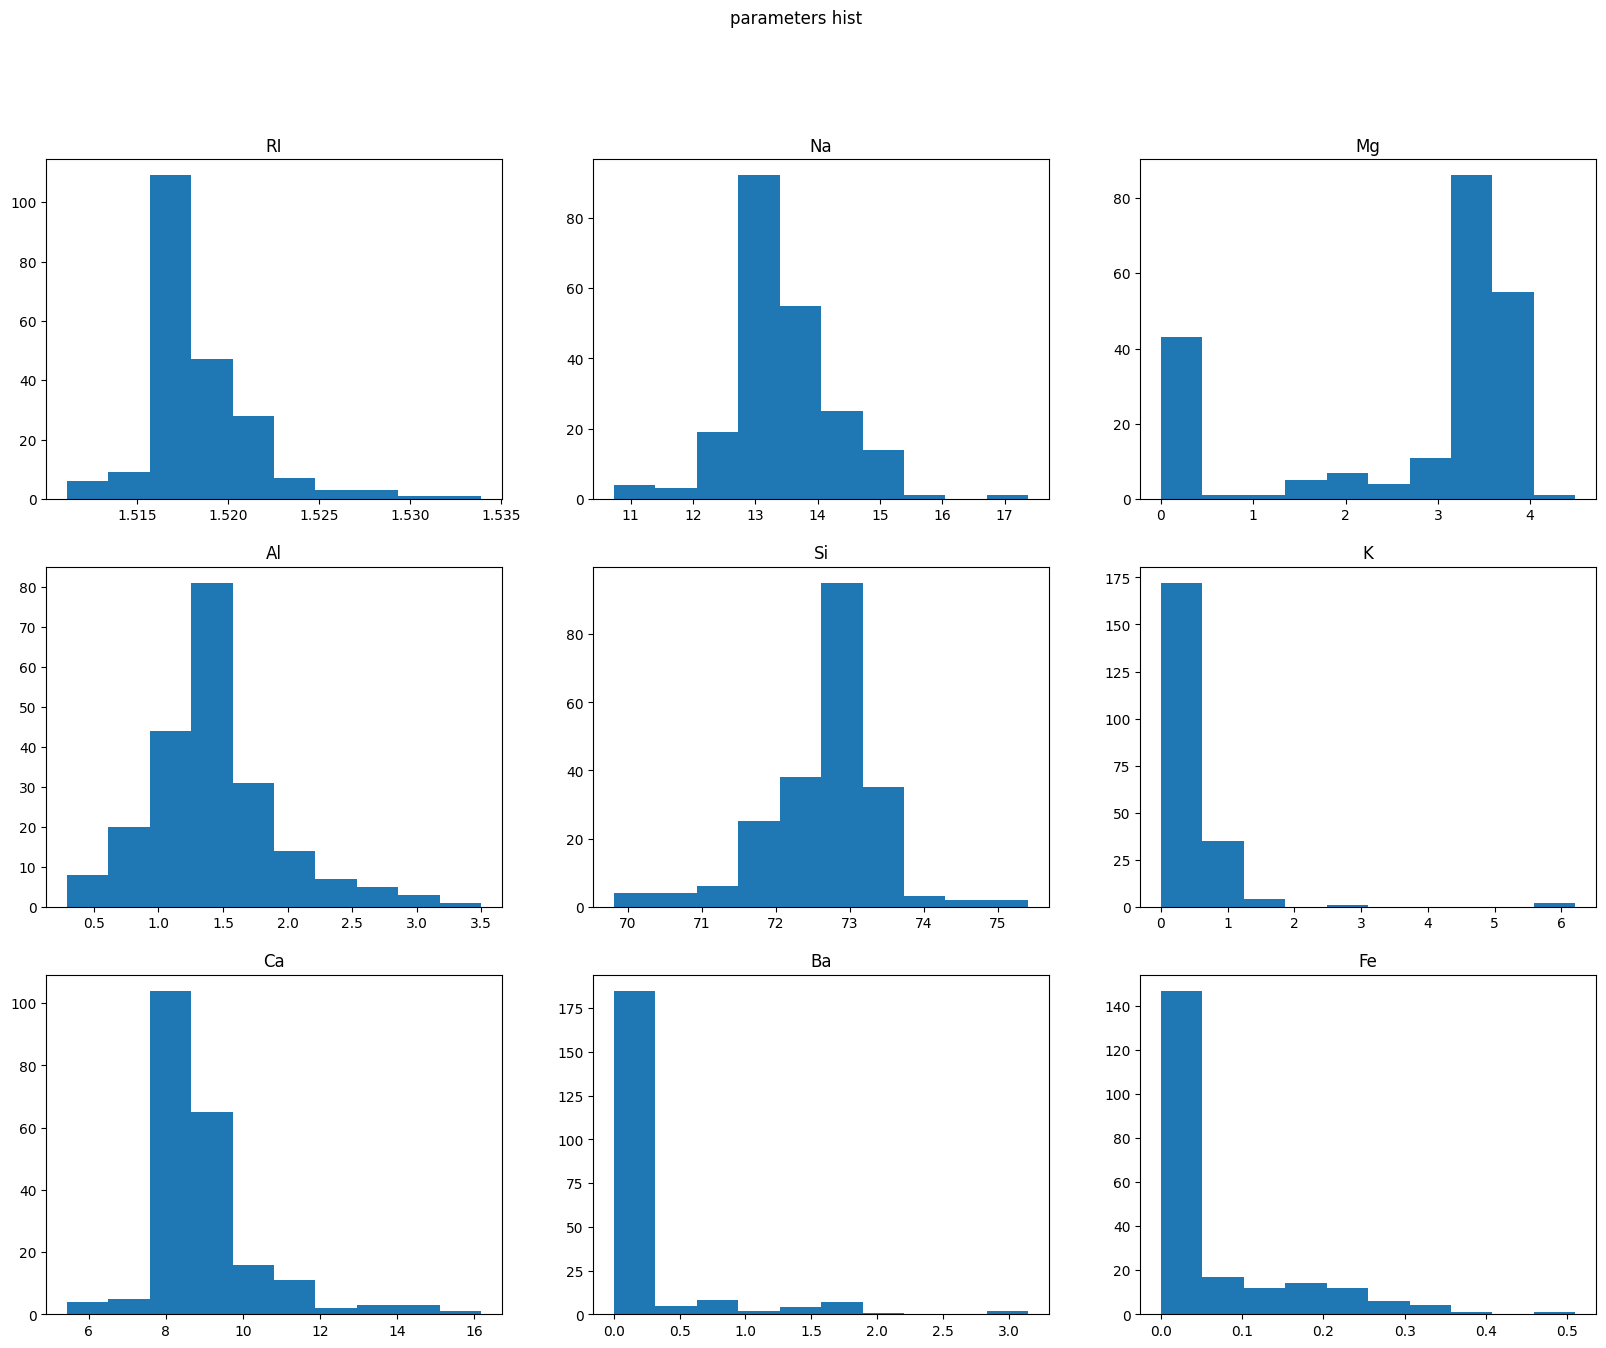

In [ ]:
k, m = 3, 3
fig, axa = plt.subplots(k,m, figsize=(20,15))
cols = iter(X.columns)

for i in range(k):
  for j in range(m):
    ax = axa[i, j]
    current_column = next(cols)
    ax.hist(X[current_column])
    ax.set_title(current_column)

fig.suptitle("parameters hist")
plt.show()

In [ ]:
# Предположим, что выбросы находятся ниже квантиля 0.01 и выше квантиля 99, и удалим их:

for col in X.columns:
  q99 = X[col].quantile(0.99) # значение переменной, ниже которого находится 99% данных
  q01 = X[col].quantile(0.01) # значение переменной, ниже которого находится 01% данных
  X = X.loc[X[col].between(q01, q99)]

In [ ]:
X

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26
...,...,...,...,...,...,...,...,...,...
208,1.51640,14.37,0.00,2.74,72.85,0.00,9.45,0.54,0.00
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00


In [ ]:
y = y[y.index.isin(X.index)]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
clf_rf = RandomForestClassifier(random_state=42,  min_samples_split=4)
clf_rf.fit(X_train, y_train)
clf_rf.score(X_train, y_train), clf_rf.score(X_test, y_test)

(0.993103448275862, 0.7297297297297297)

Метрика ухудшилась. Сравним количество оставшихся "Типов" с исходным количеством

In [ ]:
type_counts = df['Type'].value_counts()
type_counts_new = y.value_counts()

counts = pd.concat([type_counts, type_counts_new], axis=1)
counts.columns = ['before', 'after']
counts['percentage_removed'] = (counts['before'] - counts['after']) / counts['before'] * 100
counts

,before,after,percentage_removed
2,76,65,14.473684
1,70,67,4.285714
7,29,19,34.482759
3,17,16,5.882353
5,13,8,38.461538
6,9,7,22.222222


Видим, что слишком большой процент данных был удален из типов 5, 6, 7.

Повторим удаление выбросов, но в этот раз не будет завтрагивать наблюдения с Type = 5, 6, 7

In [ ]:
X = df.copy()
for col in X.columns:
  if col != 'Type':
    q99 = X[col].quantile(0.99) # значение переменной, ниже которого находится 99% данных
    q01 = X[col].quantile(0.01) # значение переменной, ниже которого находится 01% данных
    X = X.loc[(X[col].between(q01, q99)) | (X['Type'].isin([5, 6 ,7]))]

In [ ]:
X

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


In [ ]:
y = X['Type']
del X['Type']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf_rf = RandomForestClassifier(random_state=42,  min_samples_split=4)
clf_rf.fit(X_train, y_train)
clf_rf.score(X_train, y_train), clf_rf.score(X_test, y_test)

(0.9875, 0.8)

Метрика улучшилась, однако относительно метрики до работы с выбросами - ухудшилась.

Следовательно делаем вывод, что работа с выбросами, заключающаяся в удалении значений выше/ниже квантилей 99/1 % не эффективна.

Попробуем использовать Isolation Forest

In [ ]:
from sklearn.ensemble import IsolationForest

In [ ]:
X = df.copy()
del X['Type']

In [ ]:
clf = IsolationForest(random_state=42)
clf.fit(X)
X_pred = clf.predict(X)

In [ ]:
X_pred

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1, -1, -1, -1,  1,  1, -1, -1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1, -1, -1,  1, -1, -1,  1,  1,  1,  1, -1,  1,  1,  1, -1, -1, -1,
        1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1])

In [ ]:
X['anomaly'] = X_pred

In [ ]:
X = X[X.anomaly == 1]
del X['anomaly']
y = df.copy()['Type']
y = y[y.index.isin(X.index)]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf_rf = RandomForestClassifier(random_state=42,  min_samples_split=4)
clf_rf.fit(X_train, y_train)
clf_rf.score(X_train, y_train), clf_rf.score(X_test, y_test)

(0.987012987012987, 0.6923076923076923)

Вывод:

Метрики модели ухудшились.

Поиск и удаление выбросов из датасета не принесли результатов.